### 1. Load Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequalityN.csv")
print("Shape:", df.shape)
df

Shape: (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2. Inspect Dataset

In [3]:
# Missing values
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [4]:
# Data types
print("\nData types:\n", df.dtypes)


Data types:
 type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
# Quick look at quality distribution
print("\nQuality value counts:\n", df['quality'].value_counts().sort_index())


Quality value counts:
 quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


C:\Users\kotha\AppData\Local\Temp\ipykernel_15276\2932102335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette="viridis")


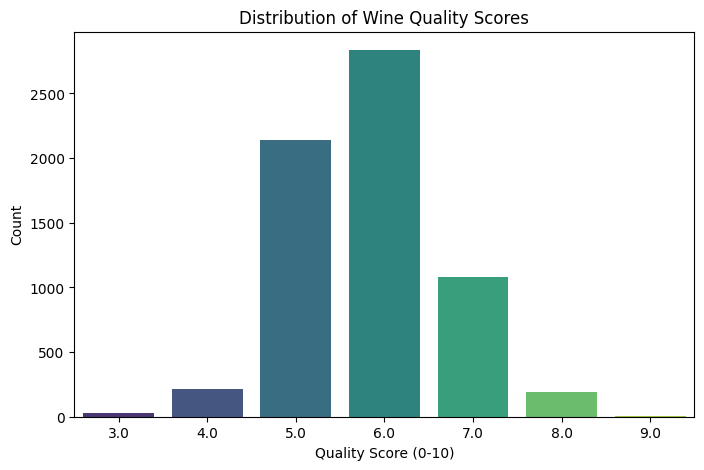

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette="viridis")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score (0-10)")
plt.ylabel("Count")
plt.show()

### 3. Handle missing values

In [6]:
# Impute numeric columns with median
imputer = SimpleImputer(strategy='median')
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

df = df.dropna().reset_index(drop=True)

print("Remaining missing values:", df.isna().sum().sum())

Remaining missing values: 0


### 4. Encode categorical 'type' column (red/white)

In [7]:
if 'type' in df.columns:
    df['type'] = df['type'].str.lower().str.strip()
    df['type'] = df['type'].map({'red':0, 'white':1})  # red=0, white=1
    print("Type column encoded as 0=red, 1=white")

df

Type column encoded as 0=red, 1=white


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.51,11.2,6.0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


### 5. Create target labels

In [8]:
# Binary target: 0=low (<=5), 1=good (>=6)
df['quality_binary'] = (df['quality'] >= 6).astype(int)

# Optional 3-class target
df['quality_3class'] = df['quality'].apply(lambda q: 0 if q<=5 else (1 if q==6 else 2))

print("Binary label distribution:\n", df['quality_binary'].value_counts())
print("3-class label distribution:\n", df['quality_3class'].value_counts())

Binary label distribution:
 quality_binary
1    4113
0    2384
Name: count, dtype: int64
3-class label distribution:
 quality_3class
1    2836
0    2384
2    1277
Name: count, dtype: int64


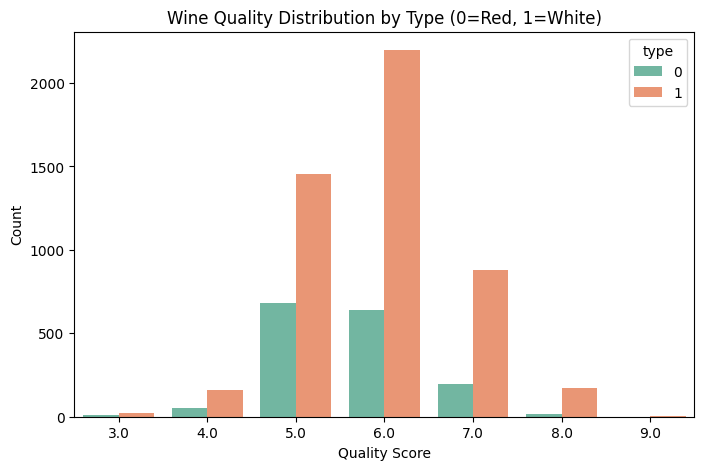

Average quality scores by type:


type
0    5.636023
1    5.877909
Name: quality, dtype: float64

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', hue='type', data=df, palette="Set2")
plt.title("Wine Quality Distribution by Type (0=Red, 1=White)")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

print("Average quality scores by type:")
df.groupby('type')['quality'].mean()

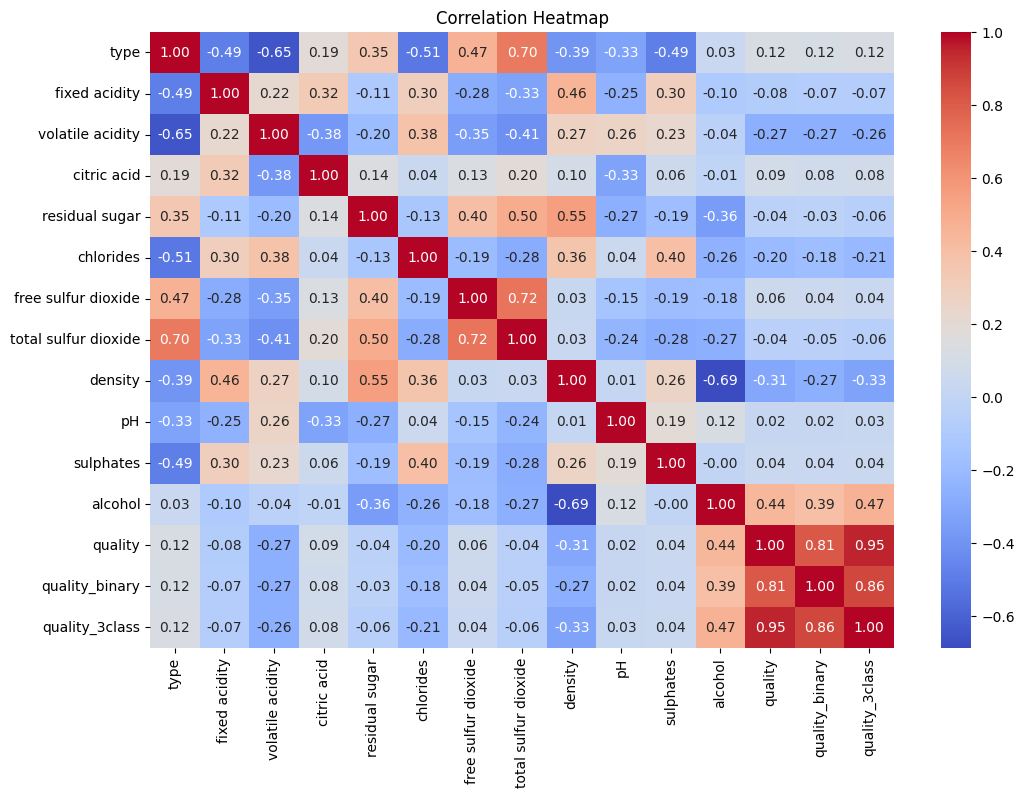

In [16]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()